In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.drop("Cabin",axis=1,inplace=True)

In [4]:
df = df.dropna(subset=["Embarked"])
df = df.dropna(subset=["Age"])

In [5]:

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: xlabel='Survived', ylabel='count'>

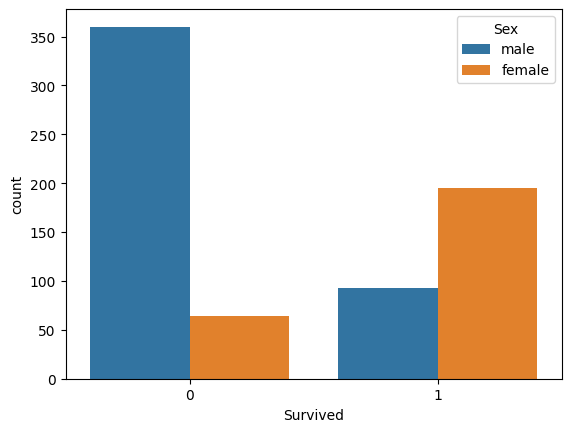

In [7]:
sns.countplot(x="Survived",hue="Sex",data=df)

<Axes: xlabel='Survived', ylabel='count'>

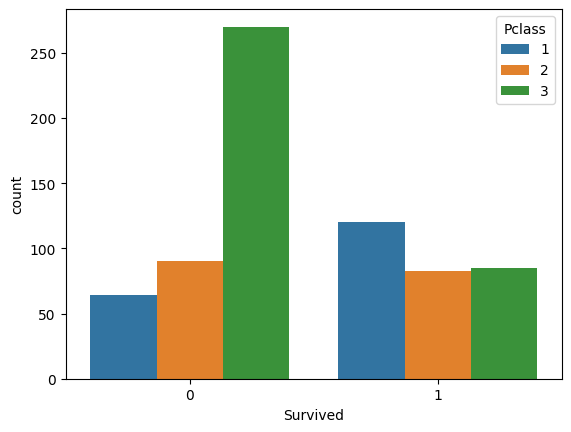

In [8]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<Axes: ylabel='Frequency'>

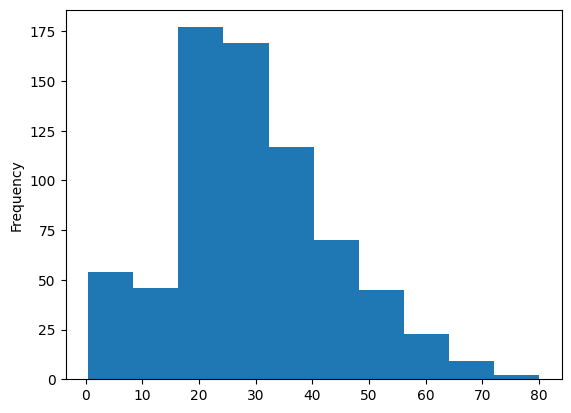

In [9]:
df["Age"].plot.hist()

<Axes: xlabel='Survived', ylabel='count'>

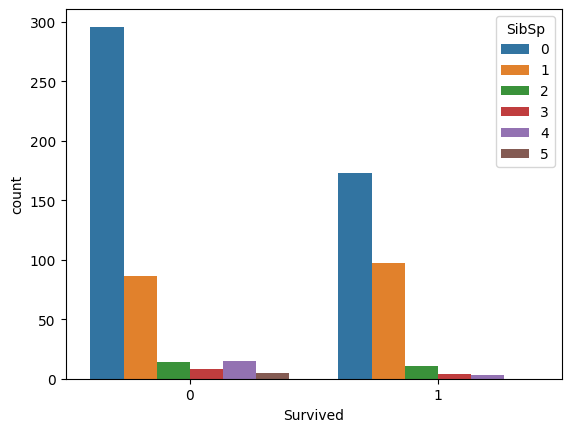

In [10]:
sns.countplot(x="Survived",hue="SibSp",data=df)

<Axes: xlabel='SibSp', ylabel='count'>

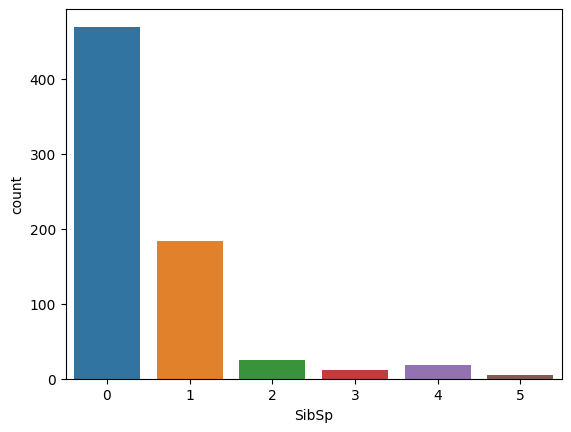

In [11]:
sns.countplot(x="SibSp",data=df)

<Axes: xlabel='Parch', ylabel='count'>

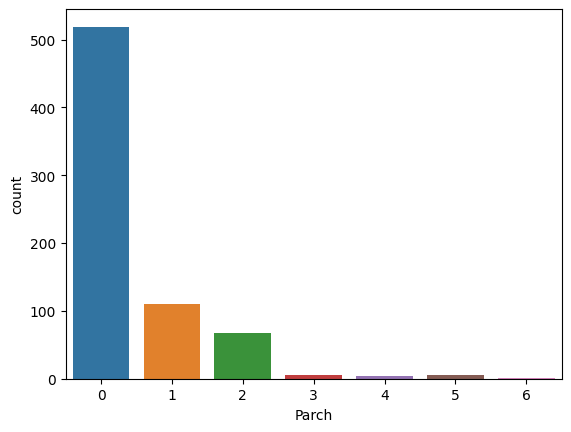

In [12]:
sns.countplot(x="Parch",data=df)

<Axes: xlabel='Survived', ylabel='count'>

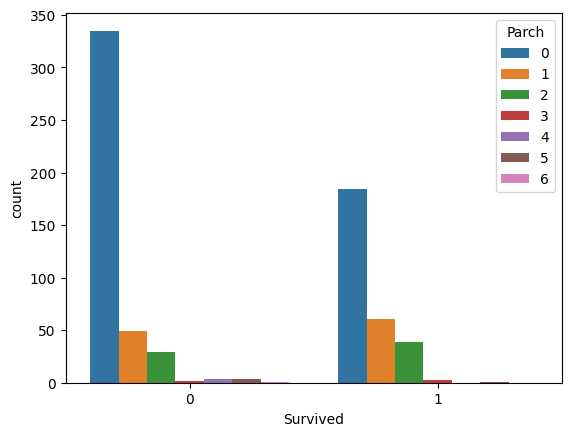

In [13]:
sns.countplot(x="Survived",hue="Parch",data=df)

<Axes: xlabel='Survived', ylabel='count'>

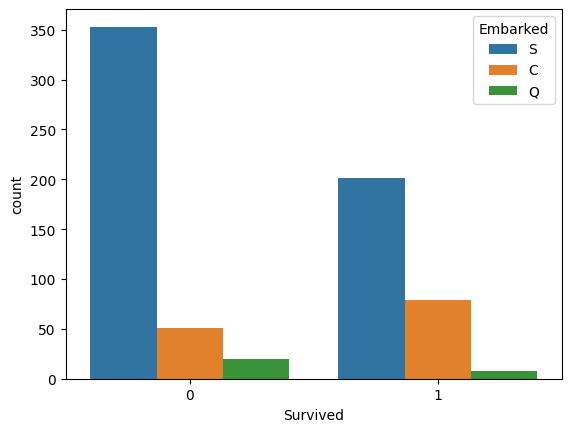

In [14]:
sns.countplot(x="Survived",hue="Embarked",data=df)

In [15]:
pd.get_dummies(df["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [16]:
gender=pd.get_dummies(df["Sex"],drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [17]:
df=pd.concat([df,gender],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
 11  male         712 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(1)
memory usage: 67.4+ KB


In [19]:
df.drop(["PassengerId","Name","Ticket","Sex"],axis=1,inplace=True)


In [20]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [21]:
emb=pd.get_dummies(df["Embarked"])

In [22]:
emb.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [23]:
emb=pd.get_dummies(df["Embarked"],drop_first=True)
emb.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
df=pd.concat([df,emb],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1


In [25]:
df.drop(["Embarked","SibSp","Fare","Q","S"],axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,Parch,male
0,0,3,22.0,0,1
1,1,1,38.0,0,0
2,1,3,26.0,0,0
3,1,1,35.0,0,0
4,0,3,35.0,0,1


In [26]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [27]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.84,random_state=10)

In [29]:
X_train

,Pclass,Age,Parch,male
775,3,18.0,0,1
695,2,52.0,0,1
234,2,24.0,0,1
402,3,21.0,0,0
549,2,8.0,1,1
...,...,...,...,...
462,1,47.0,0,1
399,2,28.0,0,0
668,3,43.0,0,1
156,3,16.0,0,0


In [30]:
lr_model = LogisticRegression()

In [31]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [32]:
pred=lr_model.predict(X_test)

In [33]:
pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1])

In [34]:
y_test

104    0
460    1
471    0
683    0
380    1
      ..
43     1
80     0
242    0
720    1
763    1
Name: Survived, Length: 114, dtype: int64

In [35]:
accuracy_score(pred,y_test)

0.8421052631578947